In [30]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#define physical constants for pendulum
g = 9.81
l = .5

#calculate the angular acceleration of the upper pendulum
#takes current theta and angular velocities of both pendulums as arguments
#returns the angular acceleration
def calAccel1(theta1, vel1, theta2, vel2):
    numerator1 = 3*g*(math.sin(theta1-2*theta2)+3*math.sin(theta1))
    numerator2 = 3*l*(vel1**2)*math.sin(2*(theta1-theta2))
    numerator3 = 4*l*(vel2**2)*math.sin(   theta1-theta2 )
    denominator =  l*(9*math.cos(2*(theta1-theta2)) - 23)
    accel1 = 3*(numerator1+numerator2+numerator3)/denominator
    return accel1

#calculate the angular acceleration of the lower pendulum
#takes current theta and angular velocities of both pendulums as arguments
#returns the angular acceleration
def calAccel2(theta1, vel1, theta2, vel2):
    numerator1 =  9*g*math.sin(2*theta1-theta2)
    numerator2 = -7*g*math.sin(theta2)
    numerator3 = 16*l*(vel1**2)*math.sin(   theta1-theta2 )
    numerator4 =  3*l*(vel2**2)*math.sin(2*(theta1-theta2))
    denominator = l*(23 - 9*math.cos(2*(theta1-theta2)))
    accel2 = 3*(numerator1+numerator2+numerator3+numerator4)/denominator
    return accel2



In [31]:

#perform a single iteration of Bashforth Adams on upper pendulum
#takes arrays of theta and angular velocity
#returns next calculated state as tuple
def iterate1(theta1, vel1, theta2, vel2, dt):
    accel0 = calAccel1(theta1[-2],vel1[-2],theta2[-2],vel2[-2])
    accel1 = calAccel1(theta1[-1],vel1[-1],theta2[-1],vel2[-1])
    
    thn = theta1[-1] + 1.5*dt*vel1[-1] - 0.5*dt*vel1[-2]
    vn = vel1[-1] + 1.5*dt*accel1 - 0.5*dt*accel0
    
    return (thn,vn) 

#on lower pendulum
def iterate2(theta1, vel1, theta2, vel2, dt):
    accel0 = calAccel2(theta1[-2],vel1[-2],theta2[-2],vel2[-2])
    accel1 = calAccel2(theta1[-1],vel1[-1],theta2[-1],vel2[-1])
    
    thn = theta2[-1] + 1.5*dt*vel2[-1] - 0.5*dt*vel2[-2]
    vn = vel2[-1] + 1.5*dt*accel1 - 0.5*dt*accel0
    
    return (thn,vn)
    

In [32]:

#performs the specified number of iterations on a double pendulum given initial conditions
#returns arrays containing the trajectories
def computeDoublePendulum(iterations, dt, theta1i, theta2i):
    theta1 = [theta1i,theta1i]
    theta2 = [theta2i,theta2i]
    vel1 = [0,0]
    vel2 = [0,0]
    
    for i in range(iterations):
        pend1 = iterate1(theta1, vel1, theta2, vel2, dt)
        pend2 = iterate2(theta1, vel1, theta2, vel2, dt)
        theta1.append(pend1[0])
        vel1.append(pend1[1])
        theta2.append(pend2[0])
        vel2.append(pend2[1])  
    
    return (theta1, vel1, theta2, vel2)

#finds cartesian coordinates of pendulum endpoints given angle arrays
#returns tuple of coordinate arrays
def computePositions(theta1,theta2):
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    if(len(theta1)!=len(theta2)):
        print("computePositions: theta lists must be same length!")
    for i in range(len(theta1)):
        y1.append(-l*math.cos(theta1[i]))
        x1.append(-l*math.sin(theta1[i]))
        y2.append(y1[-1]-l*math.cos(theta2[i]))
        x2.append(x1[-1]-l*math.sin(theta2[i]))
    return (x1,y1,x2,y2)


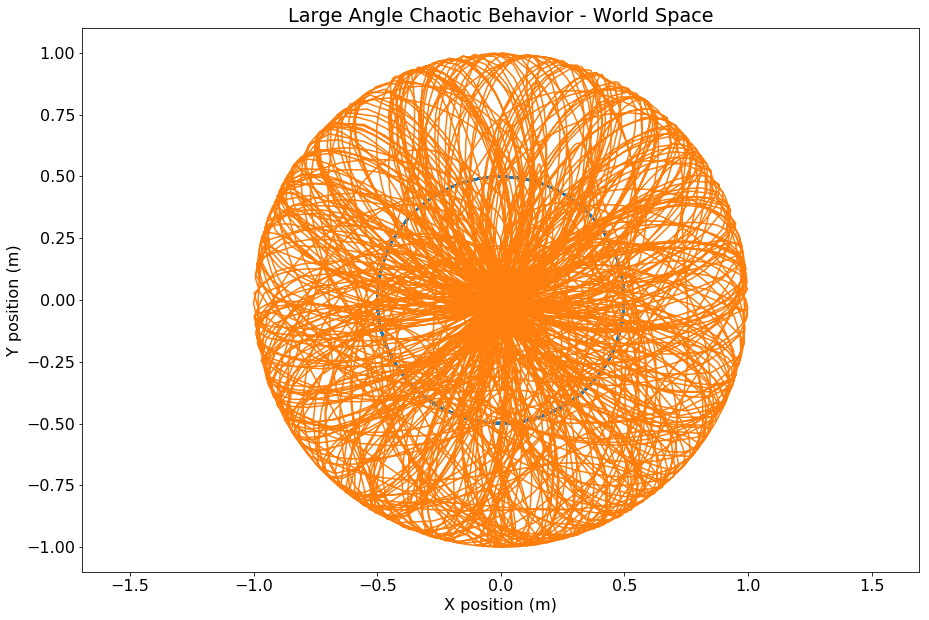

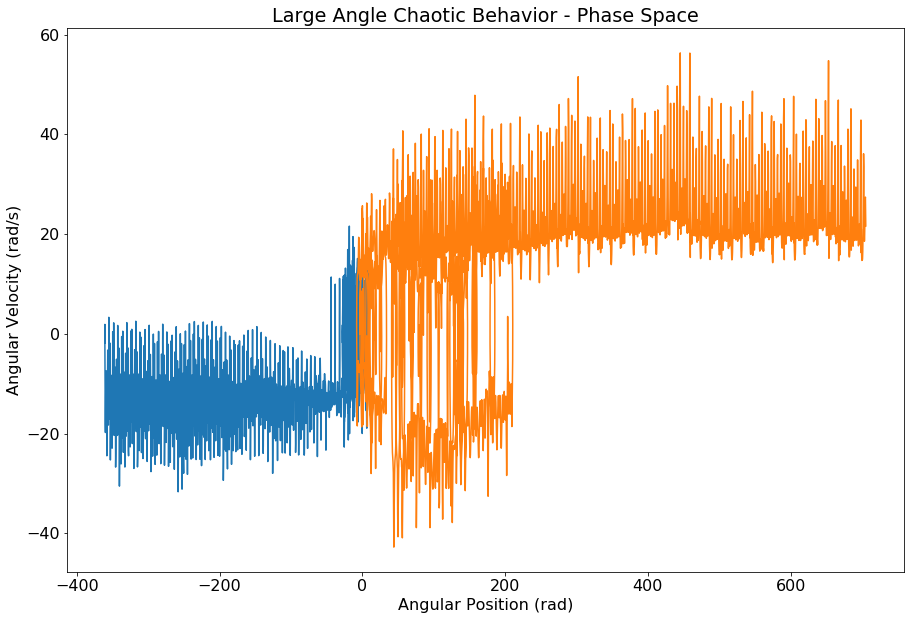

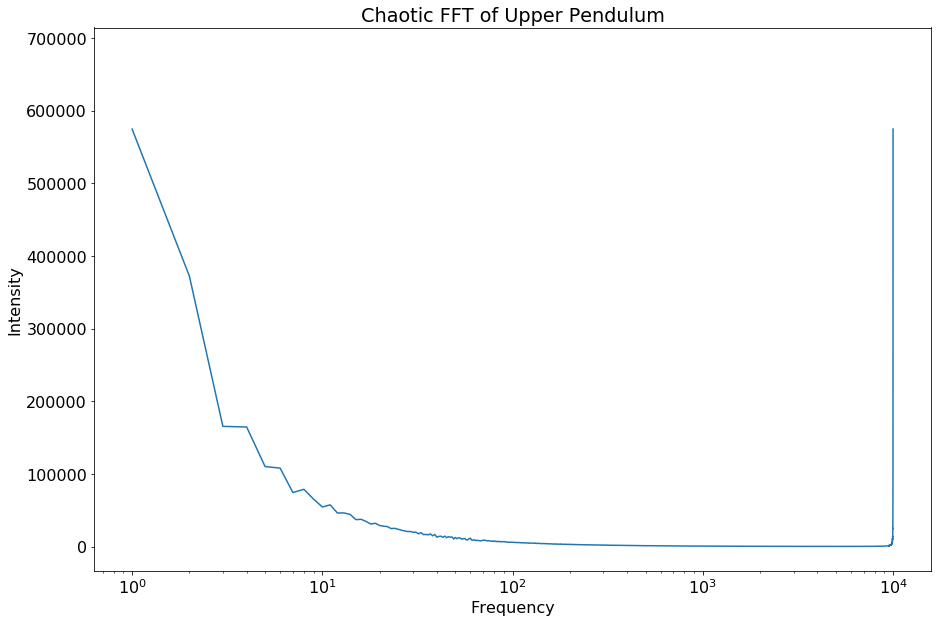

In [33]:
#compute angular arrays
(th1,v1,th2,v2) = computeDoublePendulum(10000, .01, 4.6, -3.4)
#compute cartesian arrays
(x1,y1,x2,y2) = computePositions(th1,th2)

#Plot in world space
plt.clf()
matplotlib.rcParams.update({'font.size':'16'})
plt.figure(figsize=(15,10))
plt.scatter(0,0)
plt.plot(x1,y1,x2,y2)
plt.title("Large Angle Chaotic Behavior - World Space")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.ylim(-1.2,1.2)
plt.axis("equal")
plt.show()

#Plot in phase space
plt.clf()
matplotlib.rcParams.update({'font.size':'16'})
plt.figure(figsize=(15,10))
plt.plot(th1,v1, th2,v2)
plt.title("Large Angle Chaotic Behavior - Phase Space")
plt.xlabel("Angular Position (rad)")
plt.ylabel("Angular Velocity (rad/s)")
plt.show()

#plot FFT
plt.clf()
plt.figure(figsize=(15,10))
plt.semilogx(np.abs(np.fft.fft(th1)))
plt.title("Chaotic FFT of Upper Pendulum")
plt.xlabel("Frequency")
plt.ylabel("Intensity")
plt.show()